# Lecture 20 Pipelines Part 2

In [9]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 

# Non-Linear Relationships and Pipelines

Our linear regression model has served us quite well thus far in making predictions. We can feed in our features, and get a model that can make, often very good, predictions for our target. However, there are many cases where a linear model is not the best choice. In this notebook, we will explore some of these cases, and how we can use pipelines to make our models more flexible. In particular, a linear regression model, and all other linear models that we'll encounter as we progress, is not able to capture relationships that are non-linear. For an illustration of the issue, we'll load the Anscombe quartet data and look at one of the datasets. 

In [10]:
#Data
d2 = sns.load_dataset("anscombe")
d1 = d2[d2["dataset"]=="I"]
d2 = d2[d2["dataset"]=="II"]
d2.head()

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


Return of Anscombe... We can look at dataset 2, which is a pretty clear non-linear relationship. Our linear regression line follows the general pattern of the data, but it is pretty clearly not a good fit. The difference is that our data has a curve, and our linear model isn't capable of modelling anything outside of a straight line. The target y, and the feature x, have a non-linear relationship. As x changes, y also changes - there is a relationship, however that relationship is not linear and thus can't be well captured with a linear regression. If we also plot the residuals, there appears to be a distinct pattern. 

<AxesSubplot: xlabel='x', ylabel='y'>

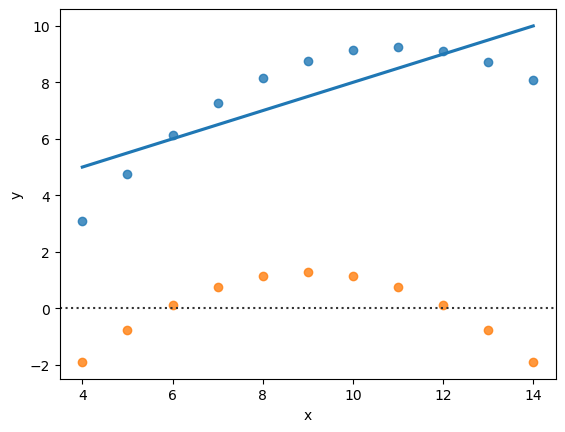

In [11]:
#Plot regresion and residuals

sns.regplot(data=d2, x="x", y="y", ci=0)

sns.residplot(data=d2, x="x", y="y")


In [12]:
#Regular regression
x = np.array(d2["x"]).reshape(-1,1)
y = np.array(d2["y"]).reshape(-1,1)

m1 = LinearRegression()
m1.fit(x,y)
m1Pred = m1.predict(x)

rmse = np.sqrt(mean_squared_error(y,m1Pred))
r2 = m1.score(x,y)
print(rmse)
print(r2)

1.1191023557497446
0.6662420337274844


<h3>Regression Results</h3>

We can plot it. We can perform a linear regression. It doesn't really look like the best choice though. Visually, the fit isn't great. Numerically, the R2 isn't really great. (The RMSE is probably bad as well, but it is hard to judge that without context.) The residuals show a really distinct pattern - the data obviously forms a curve, and a linear regression is well... linear. Back when we started looking at residuals we noted that we don't want a pattern in the residuals because that is valuable info that we aren't capturing in our model. 

As an example, we can contrast the example above with another of the quartet, that is more well suited to a linear model. Here we don't have the pattern in the residuals that we do above. This model below is better fitted than the one above, even though there is pretty clearly some error. The dataset below has data that follows less of a pattern, so it is inherently harder to model. Our linear regression certainly isn't error free, but there is no specific trend in the data that the model is missing. Above, we can see that the pattern of the curve is entirely missed by the linear model. 

<AxesSubplot: xlabel='x', ylabel='y'>

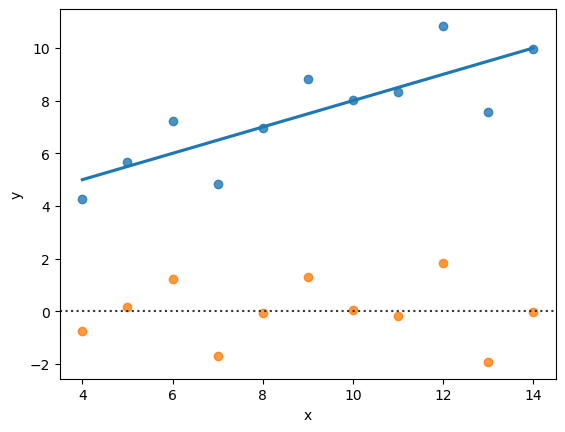

In [13]:
#Plot regresion and residuals

sns.regplot(data=d1, x="x", y="y", ci=0)

sns.residplot(data=d1, x="x", y="y")


#### Creating Better Models

To 'capture' that stuff that we missed, we can make our model different - a curve that more accurately fits the data. 

## Pipelines

To layer in our polynomial transformation, we'll use a tool called a pipeline. This is our first look at the pipeline feature, which will become very important and useful going forward. A pipeline helps up do a few things:
<ul>
<li> The pipeline object "takes the place" of our model for most actions that we call the model for - such as fit, score, and predict. 
<li> We make the pipeline by adding steps to it, the final step being the actual model. 
<li> The steps we add are mainly data preparation steps. We will cover lots of this stuff in the beginning of the machine learning course. 
<li> The end result is that we can provide data in its origninal form, and the pipeline can do all the prep stuff as it does the modelling stuff. 
</ul>

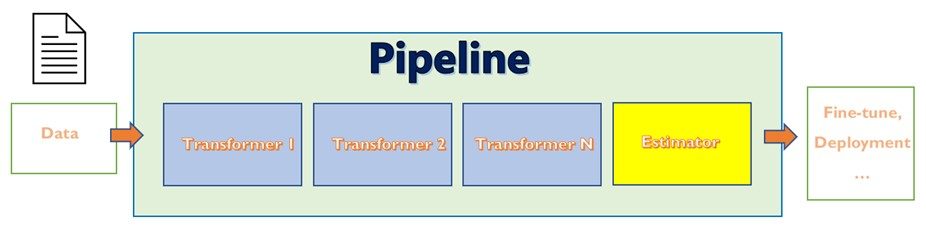

The result of making a pipeline is that we can build all of the preparation steps that we might need to do to our data into one object. Rather than doing some data preparation, taking the results, and then doing the next prep step, we can list all the steps that need to be done as steps in our pipeline. Once the pipeline is made, fit(), predict(), score(), and the other things that we normally call on our model for, are just called on the pipeline instead. The pipeline then goes through all of its steps, and then calls the model's fit, predict, score, to give us the results all in one step. As we add more things that we may want to do in preparation for our model, this becomes more important. We don't need to manage dataframes or arrays of data manually, we just define what we need done, and the pipeline will do it. 

One thing to keep note of, that will become important later on, is that each step that is part of the pipeline gets a name. This name can be used later when we may want to access that specific step. We can also declare the individual steps as variables, like the polynomial transformation below, or directly, like the linear regression.

##### Pipelines and Polynomial Transformation

Here, we have one step prior to the modelling - the polynomial transformation. So our pipeline will take the data, do the polynomial thing, then fit the model as we're used to. The pipeline then "is" our model for all intents and puposes after that, so when we want to make predictions we call predict on the pipeline, and it'll go do all of its steps and give us predictions. Once the pipeline is made, everything we feed into it goes through that polynomial transformation, and our linear regression pipeline is effectively now a "quadratic regression". 

<b>Note:</b> the make_pipeline function that is commented out is just a shortcut for creating the pipeline. The two methods are equivalent.

In [14]:
#Non linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

poly = PolynomialFeatures(degree=2)
#m2 = make_pipeline(poly, LinearRegression())
m2 = Pipeline([
    ("poly", poly),
    ("linear", LinearRegression())
    ])
m2.fit(x,y)
ypred = m2.predict(x)

In [15]:
#Metrics
rmse = np.sqrt(mean_squared_error(y,ypred))
r2 = m2.score(x,y)
print(rmse)
print(r2) 

0.0014262991646425056
0.999999457857722


<h3>Boom - More accurate. </h3>

Note the residual plot - the distances don't look great, but the default scale is really zoomed in. The actual values are tiny. 

This will also lead into one of the important concepts of Machine Learning later on - overfitting and underfitting. We want a model that reflects our data - but not one so customized that it is not able to accurately predict new data. We want something that (more or less) cuts through the middle of the data without bouncing around to "connect the dots". This is important later on...

<AxesSubplot: xlabel='x', ylabel='y'>

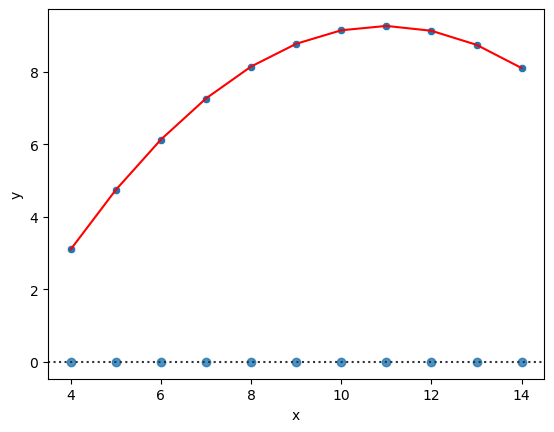

In [16]:
#Plot regresion and residuals

sns.scatterplot(data=d2, x="x", y="y")
sns.lineplot(x=x.reshape(-1), y=ypred.reshape(-1), color="red")

sns.residplot(data=d2, x="x", y="y", order=2)


## Exercise - Predict MPG from HP

Use a pipeline and a polynomial transformation to predict MPG from HP. The difference between a linear model and a polynomial one here will likely be less than the example above. 

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/DATA3320/DATA3320_1231/main/data/mtcars.csv")
df_poly = df[["mpg", "hp"]]
df_poly.head()

,mpg,hp
0,21.0,110
1,21.0,110
2,22.8,93
3,21.4,110
4,18.7,175


<AxesSubplot: xlabel='hp', ylabel='mpg'>

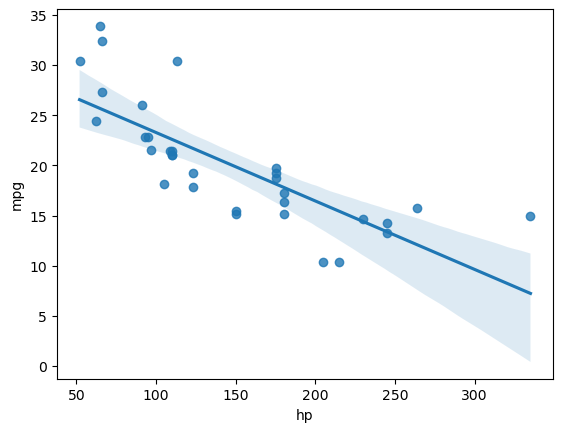

In [18]:
sns.regplot(data=df_poly, x="hp", y="mpg")

<AxesSubplot: xlabel='hp', ylabel='mpg'>

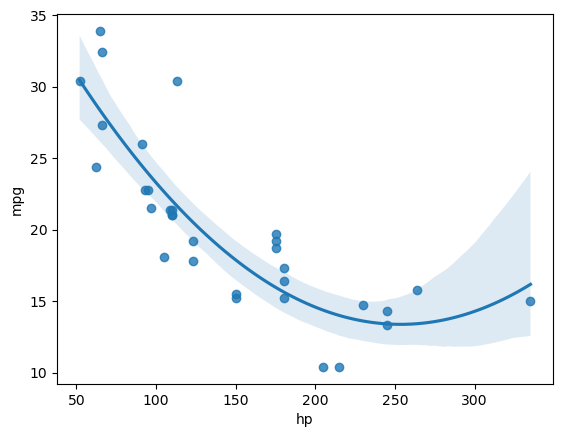

In [19]:
sns.regplot(data=df_poly, x="hp", y="mpg", order = 2)

##### Model

In [20]:
#Regular regression
xp = np.array(df_poly["hp"]).reshape(-1,1)
yp = np.array(df_poly["mpg"]).reshape(-1,1)
#Split data
xTrainP,xTestP,yTrainP,yTestP = train_test_split(xp,yp)
#Non linear regression
mpg_poly = PolynomialFeatures(degree=2)
m_poly = make_pipeline(mpg_poly, LinearRegression())
m_poly.fit(xTrainP,yTrainP)
ypred_poly = m_poly.predict(xTestP)
#Metrics
rmse = mean_squared_error(yTestP,ypred_poly, squared=False)
print(rmse)


4.457307739375515
